In [1]:
from huggingface_hub import login
login()

Token is valid.
Your token has been saved in your configured git credential helpers (osxkeychain).
Your token has been saved to /Users/lindiatjuatja/.cache/huggingface/token
Login successful


In [52]:
import datasets

glosslm = datasets.load_dataset("lecslab/glosslm", revision='6bc027f9910047159136f709aafebd835d6af8e5', ignore_verifications=True)
df = glosslm['train'].to_pandas()
print(len(df.index))

/Users/lindiatjuatja/opt/miniconda3/lib/python3.9/site-packages/datasets/load.py:1744: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(
Found cached dataset parquet (/Users/lindiatjuatja/.cache/huggingface/datasets/lecslab___parquet/lecslab--glosslm-2ada00dfe22d3c5c/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

253547


In [17]:
df_seg = df[df['is_segmented'] == 'yes']
df_unseg = df[df['is_segmented'] == 'no']
df_unk = df[df['is_segmented'] == '']

In [46]:
glottocode_df = df[df['glottocode'] != '']
unique_glottocodes = glottocode_df['glottocode'].unique()

print(glottocode_df)

                       ID glottocode  \
0            glossa4813-1   dogr1252   
1            glossa4813-2   dogr1252   
2            glossa4813-3   dogr1252   
3            glossa4813-4   dogr1252   
4            glossa4813-5   dogr1252   
...                   ...        ...   
253542  st_uspa1245_10636   uspa1245   
253543  st_uspa1245_10637   uspa1245   
253544  st_uspa1245_10637   uspa1245   
253545  st_uspa1245_10638   uspa1245   
253546  st_uspa1245_10638   uspa1245   

                                           transcription  \
0                                             chekoa edı   
1                                           ı̨xę̀ę edı   
2                                   ı̨xę̀ę  edı Ø-lı̨    
3                             naxı sınì ya ts’e e Ø h tı   
4                                  naxı sınìya ts’eeh tı   
...                                                  ...   
253542  I chi anm ri' li qab'antaj niri ri ojti oj kwin.   
253543                  pwes t-qa-k'ex 

In [47]:
import pandas as pd

seg_counts = []
unseg_counts = []
unk_counts = []
for code in unique_glottocodes:
    seg_counts.append(len(df_seg[df_seg['glottocode'] == code].index))
    unseg_counts.append(len(df_unseg[df_unseg['glottocode'] == code].index))
    unk_counts.append(len(df_unk[df_unk['glottocode'] == code].index))
    
glottocode_df = pd.DataFrame({'glottocode': unique_glottocodes, 'seg_counts': seg_counts, 'unseg_counts': unseg_counts, 'unk_counts': unk_counts})
print(glottocode_df.head())

  glottocode  seg_counts  unseg_counts  unk_counts
0   dogr1252          39            44          17
1   weee1241           2             2           0
2   stan1295        1147           125         363
3   tong1325          37            44          36
4   west2369         159           141          49


  glottocode  seg_counts  unseg_counts  unk_counts
2   stan1295        1147           125         363
3   tong1325          37            44          36
4   west2369         159           141          49
6   nucl1643         324           489         206
7   nucl1301         145           178          55


[Text(0, 0, 'japh1234'),
 Text(1, 0, 'mauw1238'),
 Text(2, 0, 'papu1250'),
 Text(3, 0, 'fwee1238'),
 Text(4, 0, 'surs1245'),
 Text(5, 0, 'gyel1242'),
 Text(6, 0, 'stan1295'),
 Text(7, 0, 'russ1263'),
 Text(8, 0, 'sout2972'),
 Text(9, 0, 'stan1290'),
 Text(10, 0, 'stan1288'),
 Text(11, 0, 'kara1499'),
 Text(12, 0, 'mati1253'),
 Text(13, 0, 'gree1276'),
 Text(14, 0, 'phal1254'),
 Text(15, 0, 'stan1293'),
 Text(16, 0, 'nucl1643'),
 Text(17, 0, 'mand1415'),
 Text(18, 0, 'dutc1256'),
 Text(19, 0, 'sout1528'),
 Text(20, 0, 'icel1247'),
 Text(21, 0, 'czec1258'),
 Text(22, 0, 'akan1250'),
 Text(23, 0, 'finn1318'),
 Text(24, 0, 'norw1258'),
 Text(25, 0, 'west2369'),
 Text(26, 0, 'nucl1301'),
 Text(27, 0, 'taga1270'),
 Text(28, 0, 'amar1273'),
 Text(29, 0, 'basq1248'),
 Text(30, 0, 'yong1288'),
 Text(31, 0, 'tong1325')]

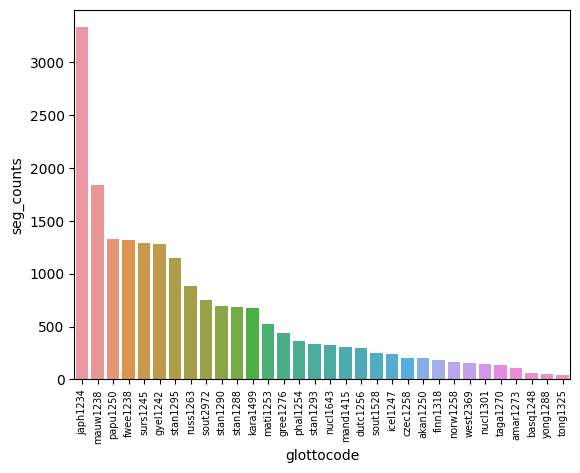

In [48]:
import seaborn as sns

cutoff = 30
df_cutoff = glottocode_df[glottocode_df['seg_counts'] > cutoff]
df_cutoff = df_cutoff[df_cutoff['unseg_counts'] > cutoff]
df_cutoff = df_cutoff[df_cutoff['unk_counts'] > cutoff]
print(df_cutoff.head())

plt = sns.barplot(x=df_cutoff['glottocode'], y=df_cutoff['seg_counts'], order=df_cutoff.sort_values('seg_counts', ascending=False).glottocode)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90, fontsize=7)

[Text(0, 0, 'japh1234'),
 Text(1, 0, 'mauw1238'),
 Text(2, 0, 'fwee1238'),
 Text(3, 0, 'gyel1242'),
 Text(4, 0, 'phal1254'),
 Text(5, 0, 'sout2972'),
 Text(6, 0, 'mati1253'),
 Text(7, 0, 'nucl1643'),
 Text(8, 0, 'kara1499'),
 Text(9, 0, 'mand1415'),
 Text(10, 0, 'russ1263'),
 Text(11, 0, 'akan1250'),
 Text(12, 0, 'amar1273'),
 Text(13, 0, 'nucl1301'),
 Text(14, 0, 'stan1288'),
 Text(15, 0, 'finn1318'),
 Text(16, 0, 'west2369'),
 Text(17, 0, 'yong1288'),
 Text(18, 0, 'stan1295'),
 Text(19, 0, 'stan1290'),
 Text(20, 0, 'papu1250'),
 Text(21, 0, 'stan1293'),
 Text(22, 0, 'taga1270'),
 Text(23, 0, 'gree1276'),
 Text(24, 0, 'norw1258'),
 Text(25, 0, 'basq1248'),
 Text(26, 0, 'surs1245'),
 Text(27, 0, 'dutc1256'),
 Text(28, 0, 'icel1247'),
 Text(29, 0, 'sout1528'),
 Text(30, 0, 'tong1325'),
 Text(31, 0, 'czec1258')]

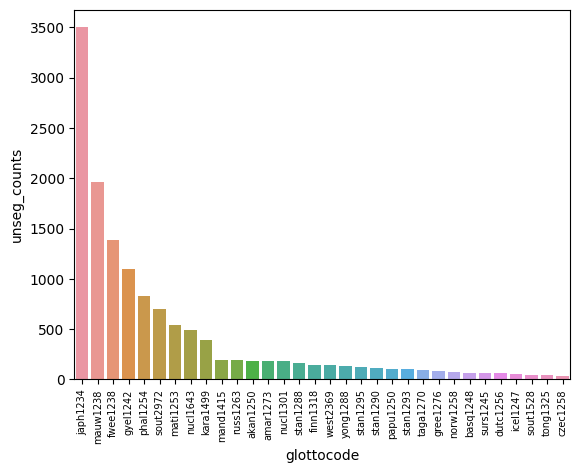

In [50]:
plt = sns.barplot(x=df_cutoff['glottocode'], y=df_cutoff['unseg_counts'], order=df_cutoff.sort_values('unseg_counts', ascending=False).glottocode)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90, fontsize=7)

[Text(0, 0, 'phal1254'),
 Text(1, 0, 'stan1295'),
 Text(2, 0, 'stan1290'),
 Text(3, 0, 'mauw1238'),
 Text(4, 0, 'kara1499'),
 Text(5, 0, 'nucl1643'),
 Text(6, 0, 'japh1234'),
 Text(7, 0, 'mand1415'),
 Text(8, 0, 'yong1288'),
 Text(9, 0, 'amar1273'),
 Text(10, 0, 'papu1250'),
 Text(11, 0, 'stan1288'),
 Text(12, 0, 'dutc1256'),
 Text(13, 0, 'russ1263'),
 Text(14, 0, 'gree1276'),
 Text(15, 0, 'fwee1238'),
 Text(16, 0, 'surs1245'),
 Text(17, 0, 'gyel1242'),
 Text(18, 0, 'akan1250'),
 Text(19, 0, 'taga1270'),
 Text(20, 0, 'nucl1301'),
 Text(21, 0, 'mati1253'),
 Text(22, 0, 'norw1258'),
 Text(23, 0, 'icel1247'),
 Text(24, 0, 'west2369'),
 Text(25, 0, 'finn1318'),
 Text(26, 0, 'sout1528'),
 Text(27, 0, 'czec1258'),
 Text(28, 0, 'tong1325'),
 Text(29, 0, 'basq1248'),
 Text(30, 0, 'stan1293'),
 Text(31, 0, 'sout2972')]

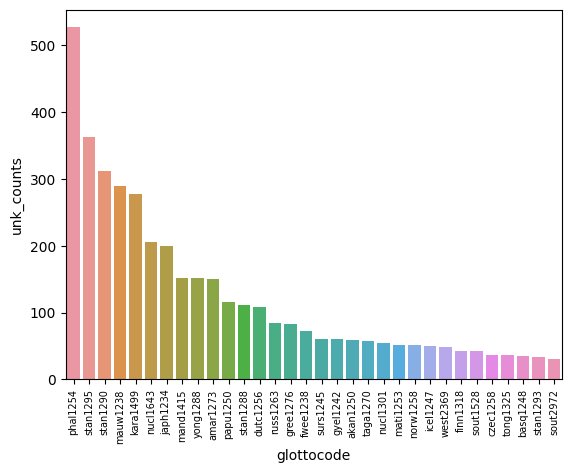

In [51]:
plt = sns.barplot(x=df_cutoff['glottocode'], y=df_cutoff['unk_counts'], order=df_cutoff.sort_values('unk_counts', ascending=False).glottocode)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90, fontsize=7)